# Simple Moving Average(Running Mean)

It is used to observe how the two variables are related to each other.


In [1]:
%load_ext jupyter_black

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import get_training_dataset

In [3]:
# Read csv file and import to df
df = get_training_dataset()

In [4]:
# Remove zeros from wind_speed
df = df[(df[["wind_speed"]] != 0).any(axis=1)]
df.head()

,typhoon_name,typhoon_year,grid_point_id,wind_speed,track_distance,total_buildings,percent_buildings_damaged
48,DURIAN,2006,8450,13.077471,262.598363,35.0,0.0
49,DURIAN,2006,8451,12.511864,273.639330,179.0,0.0
50,DURIAN,2006,8452,11.977511,284.680297,44.0,0.0
51,DURIAN,2006,8453,11.471921,295.721263,14.0,0.0
59,DURIAN,2006,8615,14.394863,239.279840,5.0,0.0


In [5]:
# Define a Function to plot the relation between each features
def ave(ftr_1, ftr_2):
    roll = (
        df.sort_values(ftr_1).reset_index(drop=True)[ftr_2].rolling(window=500).mean()
    )

    re_ftr_1 = df.sort_values(ftr_1).reset_index(drop=True)[ftr_1]
    re_ftr_2 = df.sort_values(ftr_1).reset_index(drop=True)[ftr_2]

    plt.xlabel(ftr_1)
    plt.ylabel(ftr_2)
    plt.title(f"{ftr_1} vs {ftr_2}")
    return plt.plot(re_ftr_1, re_ftr_2, "*b"), plt.plot(re_ftr_1, roll, "r")

In [6]:
# List of features while the last feature is the target
features = [
    "wind_speed",
    "track_distance",
    "total_buildings",
    "percent_buildings_damaged",
]

## Call the function wtr those features you are interested in their correlation's plot

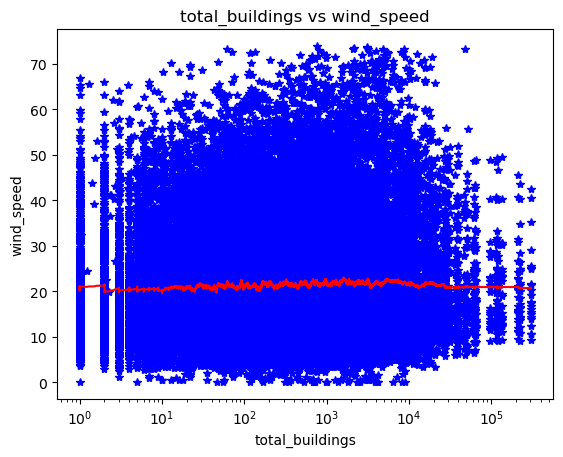

In [7]:
ave(features[2], features[0])

# Use the log scale in x or y axis to have a zoom in scatter plot
plt.xscale("log")

## How each varriable is relared to target

([<matplotlib.lines.Line2D at 0x7fad932e07f0>],
 [<matplotlib.lines.Line2D at 0x7fad932e09d0>])

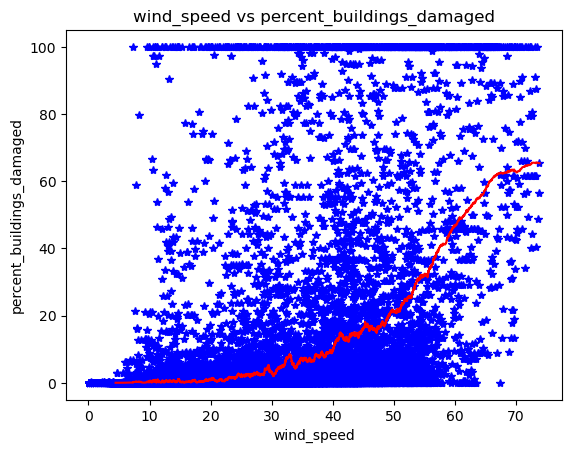

In [8]:
# wind_speed and percent_buildings_damaged
ave(features[0], features[3])

([<matplotlib.lines.Line2D at 0x7fad80394970>],
 [<matplotlib.lines.Line2D at 0x7fad80394c70>])

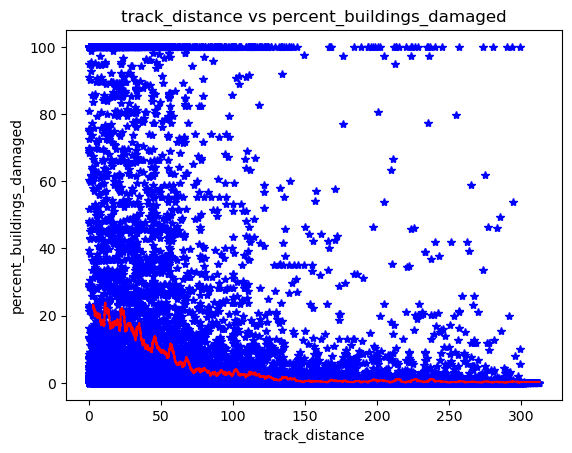

In [9]:
# track_distance and percent_buildings_damaged
ave(features[1], features[3])

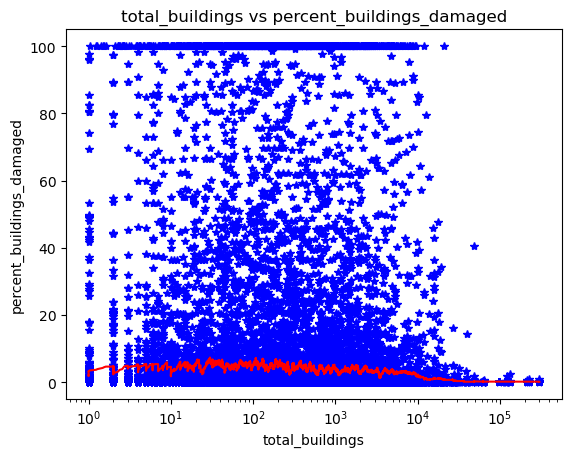

In [10]:
# total_buildings and percent_buildings_damaged
ave(features[2], features[3])
plt.xscale("log")